### Reference

https://github.com/MorvanZhou/Evolutionary-Algorithm/blob/master/tutorial-contents/Genetic%20Algorithm/Genetic%20Algorithm%20Basic.py        


In [2]:
import numpy as np
import matplotlib.pyplot as plt

# inline is static, notebook for interactive mode
%matplotlib notebook

In [3]:
DNA_SIZE = 10            # DNA length
POP_SIZE = 100           # population size
CROSS_RATE = 0.8         # mating probability (DNA crossover)
MUTATION_RATE = 0.003    # mutation probability
N_GENERATIONS = 200
X_BOUND = [0, 5]         # x upper and lower bounds

In [4]:
def F(x): 
    return np.sin(10*x)*x + np.cos(2*x)*x

#x = np.linspace(X_BOUND[0], X_BOUND[1], num=200)
#plt.plot(x, F(x))

In [5]:
def get_fitness(pred): 
    ''' how good is this sample fit the environment. 
    Make it postitive by substracting the min value
    '''
    
    return pred + 1e-3 - np.min(pred) # 1e-3 just a small number make it not zero

def translate_dna(pop): 
    ''' convert binary DNA to decimal and normalize it to a range(0, 5)
    
    Example:
        [1 0 1 1 1 0 1 1 1 1] --> 3.67057674
    '''
    
    return pop.dot(2 ** np.arange(DNA_SIZE)[::-1]) / (2 ** DNA_SIZE - 1) * X_BOUND[1]

def select(pop, fitness):  
    ''' nature selection wrt pop's fitness
    Use its fitness ratio. The higher fitness, the higher chance to be selected
    '''
    
    idx = np.random.choice(np.arange(POP_SIZE), 
                           size=POP_SIZE, 
                           replace=True,
                           p=fitness/fitness.sum())
    return pop[idx]

def crossover(parent, pop):  
    ''' mating process (genes crossover)
    '''
    
    if np.random.rand() < CROSS_RATE:
        # select another individual from pop
        i_ = np.random.randint(0, POP_SIZE, size=1)                             
        # choose crossover points
        cross_points = np.random.randint(0, 2, size=DNA_SIZE).astype(np.bool)   
        # mating and produce one child
        # np array can use arr[True, False, ...] to update values
        parent[cross_points] = pop[i_, cross_points]                            
        
    return parent

def mutate(child):
    ''' A chance to mutate 0 -> 1 or 1 -> 0
    '''
    
    for point in range(DNA_SIZE):
        if np.random.rand() < MUTATION_RATE:
            child[point] = 1 if child[point] == 0 else 0
            
    return child

<IPython.core.display.Javascript object>


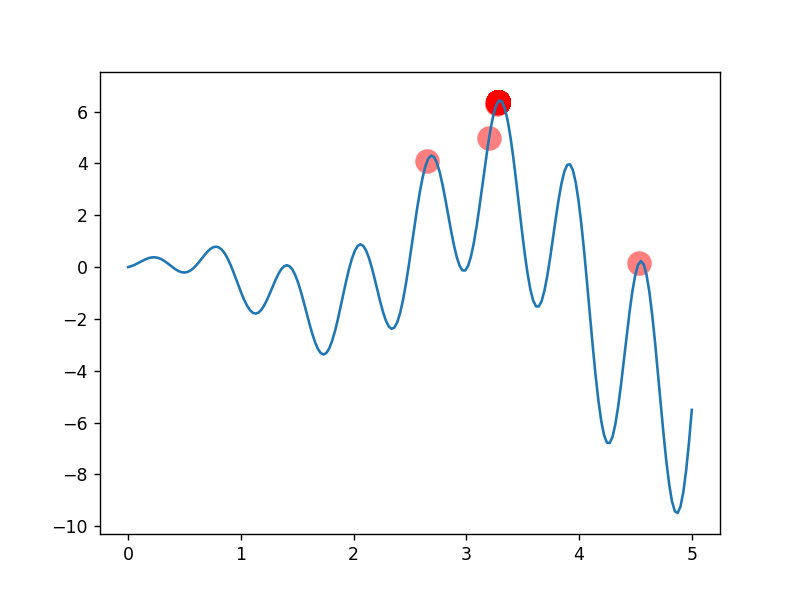

/usr/local/lib/python3.5/site-packages/matplotlib/backend_bases.py:2453: MatplotlibDeprecationWarning: Using default event loop until function specific to this GUI is implemented
  warnings.warn(str, mplDeprecation)


In [6]:
pop = np.random.randint(0, 2, (1, DNA_SIZE)).repeat(POP_SIZE, axis=0)

# interactive mode
plt.ion()       
x = np.linspace(*X_BOUND, 200)
plt.plot(x, F(x))
plt.show()

for _ in range(N_GENERATIONS):
    F_values = F(translate_dna(pop))    

    # remove existing scatter dots
    if 'sca' in globals(): 
        try:
            sca.remove()
        except:
            pass
        
    sca = plt.scatter(translate_dna(pop), 
                      F_values, 
                      s=200, 
                      lw=0, 
                      c='red', 
                      alpha=0.5)
    
    try:
        plt.pause(0.001)
    except:
        pass

    # GA part (evolution)
    fitness = get_fitness(F_values)
    
    pop = select(pop, fitness)
    pop_copy = pop.copy()
    
    for parent in pop:
        child = crossover(parent, pop_copy)
        child = mutate(child)
        parent[:] = child       # parent is replaced by its child
    
plt.ioff()
plt.show()

